In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [9]:
root = 'https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Housing%20Price%20Index%20Regression'

housing_price_index = pd.read_csv(root + '/monthly-hpi.csv')
unemployment = pd.read_csv(root + '/unemployment-macro.csv')
federal_funds_rate = pd.read_csv(root + '/fed_funds.csv')
shiller = pd.read_csv(root + '/shiller.csv')
gross_domestic_product = pd.read_csv(root + '/gdp.csv')

In [10]:
df = (shiller.merge(housing_price_index, on='date').merge(unemployment, on='date').merge(federal_funds_rate, on='date').merge(gross_domestic_product, on='date'))

In [11]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [12]:
housing_model = ols("""housing_price_index ~ total_unemployed 
                                            + long_interest_rate 
                                            + federal_funds_rate
                                            + consumer_price_index 
                                            + gross_domestic_product""", data=df).fit()
# summarize our model
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Mon, 06 Jun 2022   Prob (F-statistic):           7.32e-14
Time:                         19:04:34   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


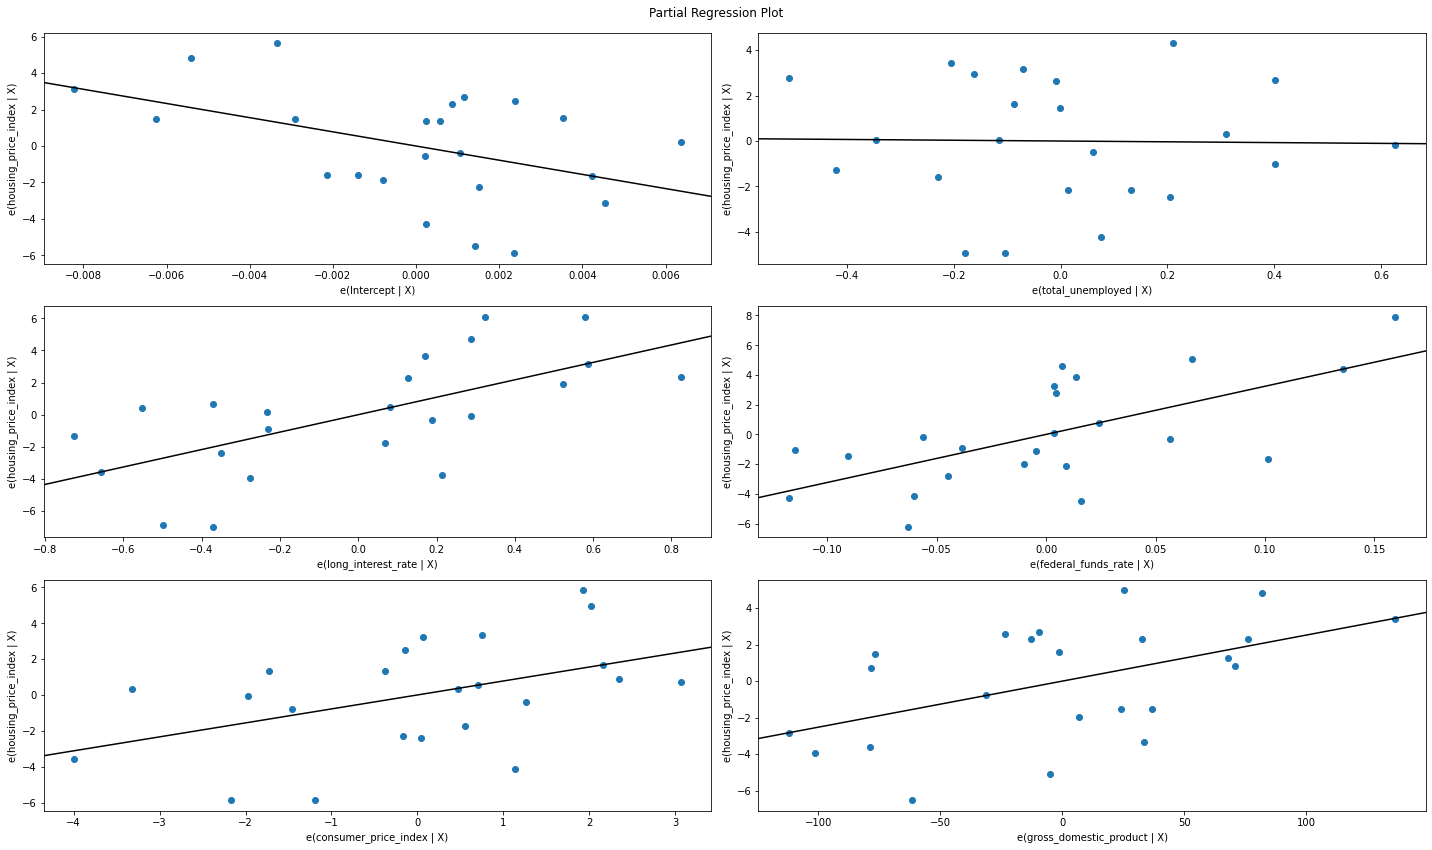

In [13]:
# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)